In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from pandas import DataFrame
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # PCA
from sklearn.preprocessing import scale # для предобработки изображений, масштаб
from time import time

In [49]:
df=pd.read_csv('heart.csv')
df = df.dropna()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [50]:
# df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 2, 5, 7], labels=[0, 1, 2]).astype(int)
# #from sklearn import preprocessing
# #X_train = df.iloc[:,:4]
# #X_normalized = preprocessing.normalize(X_train, norm='l2')
# #frame = pd.DataFrame(X_normalized, columns = ['Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'])
# #frame['Категория'] = df['Категория']
# #df = frame
# df.head(5)

In [51]:
X = np.array(df.iloc[:,:12])
y = np.array(df.iloc[:,13])
X

array([[52. ,  1. ,  0. , ...,  1. ,  2. ,  2. ],
       [53. ,  1. ,  0. , ...,  3.1,  0. ,  0. ],
       [70. ,  1. ,  0. , ...,  2.6,  0. ,  0. ],
       ...,
       [47. ,  1. ,  0. , ...,  1. ,  1. ,  1. ],
       [50. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       [54. ,  1. ,  0. , ...,  1.4,  1. ,  1. ]])

In [52]:
# настройка K-Means
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров
print(kmeans.cluster_centers_)

/home/ilia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ilia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[5.30885496e+01 7.54198473e-01 1.02900763e+00 1.29706870e+02
  2.15961832e+02 1.52671756e-01 5.77099237e-01 1.51415267e+02
  2.94656489e-01 9.96030534e-01 1.40152672e+00 6.87022901e-01]
 [5.68162162e+01 5.91891892e-01 7.89189189e-01 1.34983784e+02
  2.99175676e+02 1.43243243e-01 4.45945946e-01 1.45040541e+02
  4.10810811e-01 1.20513514e+00 1.35675676e+00 8.72972973e-01]]


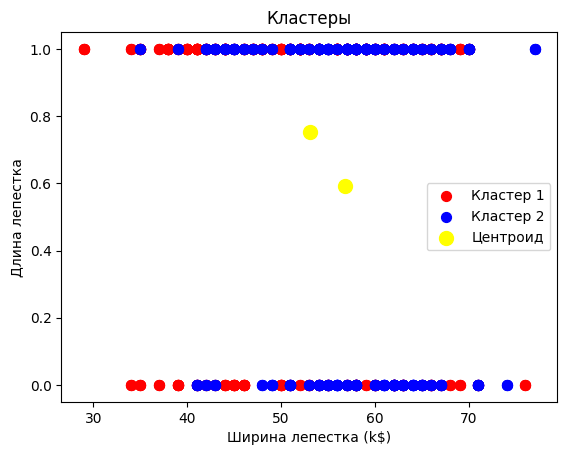

In [53]:
# визуализация кластеров
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label =
'Центроид')
plt.title('Кластеры')
plt.xlabel('Ширина лепестка (k$)')
plt.ylabel('Длина лепестка')
plt.legend(loc='best')
plt.show()

In [54]:
kl=kmeans.labels_.reshape(-1,1)
y_new=y.reshape(-1, 1)
z=np.hstack((X, y_new, kl))
z=DataFrame(z,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
z

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,0.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,0.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,0.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,0.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,1.0,0.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,0.0,1.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,0.0,1.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,1.0,0.0


## Расчет метрик

In [55]:
data = scale(X) # предобработка, масштабируем данные, приводя к нулевому среднему и единичной дисперсии

n_samples, n_features = data.shape # число примеров и число признаков
n_digits = len(np.unique(y)) # число уникальных классов
labels = y

sample_size = 300

# функция для расчета метрик
def bench_k_means(estimator, name, data):
    # принимает кластеризатор, его название, данные
    t0 = time() # старт таймера
    estimator.fit(data) # обучаем кластеризатор
    # вычисляем метрики и отображаем их
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# заголовок для таблички результатов
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# тест для k-means в котором используется улучшенный выбор начальной расстановки центроидов
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
# тест для k-means  в котором центроиды изначально выбраны случайно из данных
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# тест для k-means  в котором начальные центроиды выбраны как главные компоненты PCA
pca = PCA(n_components=n_digits).fit(data) # вычисляем главные компоненты
bench_k_means(KMeans(init=pca.components_, # используем главные компоненты как начальные положения центроидов
                     n_clusters=n_digits, n_init=1), # здесь начальные положения центроидов не изменяются, поэтому только 1 раз делаем кластеризацию
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 2, 	 n_samples 1025, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.76s	10269	0.240	0.247	0.244	0.305	0.243	0.167
random   	0.17s	10269	0.240	0.247	0.244	0.305	0.243	0.171
PCA-based	0.05s	10269	0.247	0.251	0.249	0.316	0.248	0.170
__________________________________________________________________________________


In [56]:
# # Импортируем библиотеки
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt
# import pandas as pd
# import requests
# from io import StringIO

# # Создаем датафрейм для загруженного набора данных

# # Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
# varieties = list(df.pop('target'))

# # Извлекаем измерения как массив NumPy
# samples = df.values

# # Реализация иерархической кластеризации при помощи функции linkage
# mergings = linkage(samples, method='complete')

# # Строим дендрограмму, указав параметры удобные для отображения
# dendrogram(mergings,
#            labels=varieties,
#            leaf_rotation=90,
#            leaf_font_size=6,
#            color_threshold=6,
#            )

# plt.show()

KeyboardInterrupt: 